<a href="https://colab.research.google.com/github/AntonyLeons/Data-Mining-ACW/blob/master/Legacy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legacy Data

In [1]:
import pandas as pd
import numpy as np
import random as rand # import libs
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
# from google.colab import files  # If running on google upload data

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
data=pd.read_csv('data/600092_data.csv') # import CSV

In [4]:
print(data.dtypes) # see types, conta is not a int. IPSI is float but can be an int however this should not affect the model
print(f"total heading {len(data.columns)}")

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object
total heading 11


In [5]:
data.describe(include = 'all') # Contra is an integer according to the data description but missing

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1520.000000,1520.000000,1517,1518,1520,1517,1520,1518,1516.000000,1520,1517
unique,NaN,NaN,5,2,2,2,2,2,NaN,41,3
top,NaN,NaN,A-F,no,no,no,no,no,NaN,100,NoRisk
freq,NaN,NaN,493,1441,801,784,1190,1494,NaN,244,1008
mean,0.509545,188365.022368,NaN,NaN,NaN,NaN,NaN,NaN,78.872032,NaN,NaN
std,0.284006,64355.870242,NaN,NaN,NaN,NaN,NaN,NaN,10.162351,NaN,NaN
min,0.000295,78261.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
25%,0.268531,137130.750000,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN
50%,0.517616,191344.500000,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,NaN
75%,0.754724,244559.500000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN


In [6]:
data.head(15) # quick look at the data

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
5,0.916897,169990,A-F,no,no,no,yes,no,95.0,95,Risk
6,0.383408,196122,A-F,no,yes,yes,no,no,90.0,95,Risk
7,0.538333,261057,CVA,no,no,no,no,no,75.0,60,NoRisk
8,0.678157,256128,TIA,no,no,yes,no,no,81.0,20,NoRisk
9,0.689331,196936,A-F,no,no,yes,yes,no,95.0,100,Risk


In [7]:
# looking at the top 15 rows corta is indeed a Integer and yes/no and noRisk and Risk can be replaced with 1 or 0.

In [8]:
for headings in data.columns:
    print(f"{headings} {data[headings].nunique()}")  # get total distict for each column

Random 1222
Id 1520
Indication 5
Diabetes 2
IHD 2
Hypertension 2
Arrhythmia 2
History 2
IPSI 29
Contra 41
label 3


In [9]:
# random should be unique according to the data decription but in the id is Unique and Random has ~200 repeats, this implies the columns have been switched.
# label also has 3 values but should be nominal with Risk and NoRisk values

In [10]:
data_copy = data.copy() #copy original dataframe

In [11]:
data_copy[data_copy['Random'].duplicated()] # we can see the duplicated random records are unique

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
10,0.678157,174588,CVA,no,yes,yes,yes,no,75.0,50,Risk
15,0.025356,219417,CVA,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,ASx,yes,no,yes,no,no,80.0,80,Risk
...,...,...,...,...,...,...,...,...,...,...,...
1457,0.754513,293073,A-F,no,yes,no,yes,no,95.0,100,Risk
1459,0.735681,151183,CVA,no,no,no,no,no,75.0,90,NoRisk
1467,0.889219,202550,TIA,no,no,yes,no,no,77.0,20,NoRisk
1511,0.174637,284804,TIA,no,yes,no,no,no,73.0,30,NoRisk


In [12]:
data_copy.set_index('Id',inplace=True,verify_integrity=True) # setting unique index as Id is unique

In [13]:
data.set_index('Id',inplace=True,verify_integrity=True) # setting unique index as Id is unique for reference

In [14]:
data_copy['Contra'] = pd.to_numeric(data_copy['Contra'],errors='coerce') # convert conta to numberic values replacing invalid with NaNs
data_copy.dtypes # conta now numeric 

Random          float64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra          float64
label            object
dtype: object

In [15]:
data_copy['label'].unique() #only 2 possible values

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

In [16]:
data_copy["label"] = data_copy['label'].replace('Unknown',np.nan)

In [17]:
data_copy['label'].unique()

array(['NoRisk', 'Risk', nan], dtype=object)

In [18]:
data_copy['Indication'].unique()  # Data Decription says only 4 possible values

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [19]:
data_copy['Indication'] = data_copy['Indication'].replace('Asx','ASx')

In [20]:
data_copy['Indication'].unique()

array(['A-F', 'TIA', 'CVA', 'ASx', nan], dtype=object)

In [21]:
null_headings = data_copy.isnull().any()
null_columns = data_copy.columns[null_headings]
null_column_count = data_copy[null_columns].isnull().sum() 
# find the number of null values in each column, Note Contra is absent
total = null_column_count.sum()
print(null_column_count)
print(f"total  {total}") # total records containing null values
percent = (total/len(data_copy.index))*100
print(f"Percent {percent:.3}%") #  20 records cointain null, this makes up only 1.32% of the data

Indication      3
Diabetes        2
Hypertension    3
History         2
IPSI            4
Contra          1
label           5
dtype: int64
total  20
Percent 1.32%


In [22]:
null_records = pd.DataFrame(columns=data_copy.columns)
for headings in null_columns:
    null_records = null_records.append(data_copy[data_copy[headings].isnull()]) #append all records with null values to dataframe
null_records

,Random,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
261060,0.648122,NaN,no,yes,yes,no,no,70.0,40.0,NoRisk
205845,0.211760,NaN,no,yes,no,no,no,80.0,100.0,Risk
256076,0.761219,NaN,no,no,no,yes,yes,99.0,100.0,Risk
224257,0.681744,CVA,NaN,yes,yes,yes,no,90.0,100.0,Risk
210861,0.392130,A-F,NaN,no,yes,no,no,80.0,40.0,NoRisk
240232,0.388790,CVA,yes,no,NaN,yes,no,95.0,90.0,Risk
289096,0.707950,A-F,no,no,NaN,no,no,78.0,30.0,NoRisk
158024,0.319215,TIA,no,no,NaN,no,no,75.0,75.0,NoRisk
260770,0.617072,CVA,no,yes,no,no,NaN,85.0,50.0,NoRisk
196483,0.243645,CVA,no,no,yes,yes,NaN,95.0,100.0,Risk


In [23]:
# all records with null values

In [24]:
data_copy.dropna(inplace=True) # drop na and nan records

In [25]:
data_copy.describe(include = 'all') # check 20 records removed

,Random,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1500.000000,1500,1500,1500,1500,1500,1500,1500.000000,1500.000000,1500
unique,NaN,4,2,2,2,2,2,NaN,NaN,2
top,NaN,A-F,no,no,no,no,no,NaN,NaN,NoRisk
freq,NaN,489,1425,789,777,1177,1478,NaN,NaN,1000
mean,0.509543,NaN,NaN,NaN,NaN,NaN,NaN,78.828000,56.668000,NaN
std,0.284369,NaN,NaN,NaN,NaN,NaN,NaN,10.159555,29.524977,NaN
min,0.000295,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,10.000000,NaN
25%,0.267899,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,30.000000,NaN
50%,0.517616,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,50.000000,NaN
75%,0.754724,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,85.000000,NaN


In [26]:
# pd.to_numeric(data_copy['IPSI'],downcast='integer',errors='coerce')

In [27]:
# data_dummy = pd.get_dummies(data_copy, columns=['Diabetes']) # working get dummies

In [28]:
data.loc[254469]

Random          0.518558
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 254469, dtype: object

In [29]:
class_data = data_copy.copy()
class_data = class_data.drop(columns=['Random'])
class_data

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
Id,,,,,,,,,
218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...
93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk


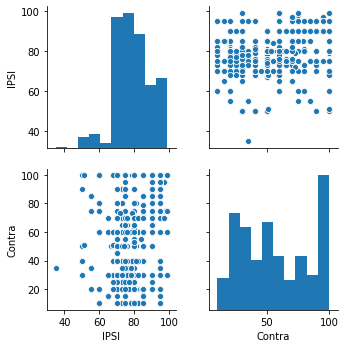

In [30]:
sns.pairplot(class_data)

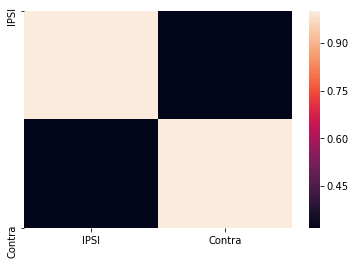

In [31]:
sns.heatmap(class_data.corr())

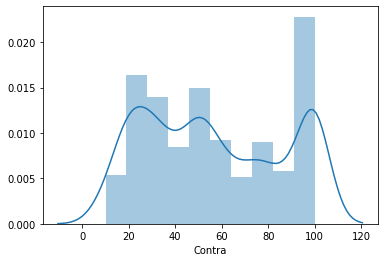

In [32]:
sns.distplot(class_data['Contra'])

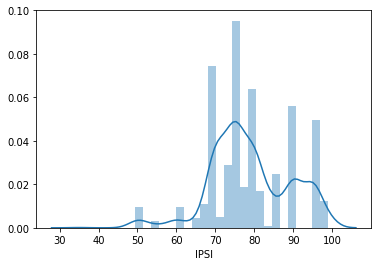

In [33]:
sns.distplot(class_data['IPSI'])

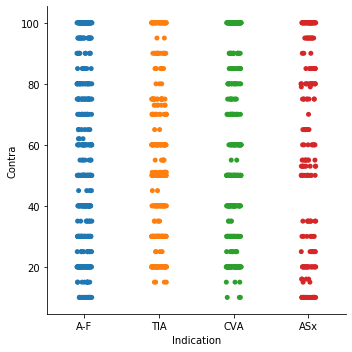

In [34]:
sns.catplot(x='Indication',y='Contra',data=class_data)

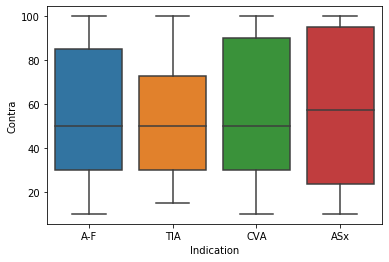

In [35]:
sns.boxplot(x='Indication',y='Contra',data=class_data)

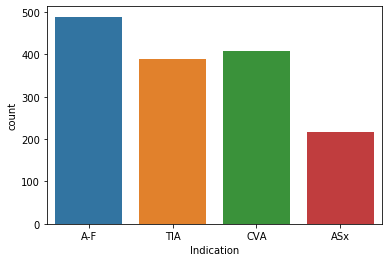

In [36]:
sns.countplot(class_data['Indication'],Label='count')

In [53]:
le = preprocessing.LabelEncoder()
class_data['label']=le.fit_transform(class_data['label'])
class_data['Diabetes']=le.fit_transform(class_data['Diabetes'])
class_data['IHD']=le.fit_transform(class_data['IHD'])
class_data['Hypertension']=le.fit_transform(class_data['Hypertension'])
class_data['Arrhythmia']=le.fit_transform(class_data['Arrhythmia'])
class_data['History']=le.fit_transform(class_data['History'])
class_data['Indication_e']=le.fit_transform(class_data['Indication']) # alphabetical

class_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,Indication_e
Id,,,,,,,,,,
218242,A-F,0,0,1,0,0,78.0,20.0,0,0
159284,TIA,0,0,0,0,0,70.0,60.0,0,3
106066,A-F,0,1,1,0,0,95.0,40.0,1,0
229592,TIA,0,0,1,0,0,90.0,85.0,1,3
245829,CVA,0,0,0,0,0,70.0,20.0,0,2


In [38]:
split = sklearn.model_selection.train_test_split(class_data,shuffle=True)
train = split[0]
test = split[1]

In [39]:
model = LogisticRegression()
train_x = train['IPSI']
train_y = train['label']
test_x = test['IPSI']
test_y = test['label']
print(train_x.shape)
print(train_y.shape)

(1125,)
(1125,)


In [40]:
train_x = np.asarray(train_x).reshape(-1,1)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x).reshape(-1,1)
test_y = np.asarray(test_y).reshape(-1,1)
print(train_x.shape)
print(train_y.shape)

(1125, 1)
(1125,)


In [41]:
reg_model = model.fit(X=train_x,y=train_y)

c:\users\anton\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
pred_y = reg_model.predict(test_x)

In [43]:
reg_model.score(test_x,test_y)

0.7813333333333333

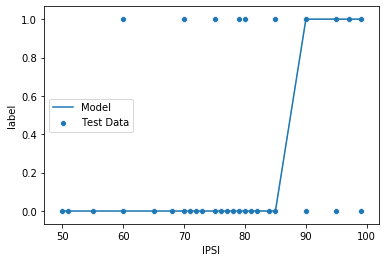

In [44]:
sns.lineplot(x=test['IPSI'], y=pred_y.ravel(), label='Model')
sns.scatterplot(x=test['IPSI'], y=test['label'], label='Test Data')

In [45]:
split = sklearn.model_selection.train_test_split(class_data,shuffle=True)
train2 = split[0]
test2 = split[1]

In [46]:
model2 = LogisticRegression()
train_x2 = train2['Contra']
train_y2 = train2['label']
test_x2 = test2['Contra']
test_y2 = test2['label']
print(train_x2.shape)
print(train_y2.shape)

(1125,)
(1125,)


In [47]:
train_x2 = np.asarray(train_x2).reshape(-1,1)
train_y2 = np.asarray(train_y2)
test_x2 = np.asarray(test_x2).reshape(-1,1)
test_y2 = np.asarray(test_y2).reshape(-1,1)
print(train_x2.shape)
print(train_y2.shape)

(1125, 1)
(1125,)


In [48]:
reg_model2 = model2.fit(X=train_x2,y=train_y2)

c:\users\anton\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
pred_y2 = reg_model2.predict(test_x2)

In [50]:
reg_model2.score(test_x2,test_y2)

0.832

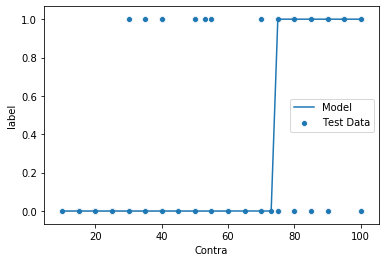

In [51]:
sns.lineplot(x=test2['Contra'], y=pred_y2.ravel(), label='Model')
sns.scatterplot(x=test2['Contra'], y=test2['label'], label='Test Data')